The material is based on my workshop at Berkeley - [Machine learning with scikit-learn](https://github.com/qingkaikong/20170628_ML_sklearn). I convert it here so that there will be more explanation. Note that, the code is written using **Python 3.6**. It is better to read the slides I have first, which you can find it [here](http://qingkaikong.blogspot.com/2017/06/machine-learning-12-machine-learning.html). You can find the notebook on [Qingkai's Github](https://github.com/qingkaikong/blog/tree/master/2017_18_scikit-learn-3). 

This week, we will talk how to use scikit-learn for regression problems. Instead of simple linear regression, we will do a regression problem on a non-linear dataset that we generate by ourselves.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

## Generate data

Let's first generate a toy dataset that we will use a Random Forest model to fit it. We generate a periodical dataset using two sine wave with different period, and then add some noise to it. It can be visualized in the following figure:

<Container object of 3 artists>

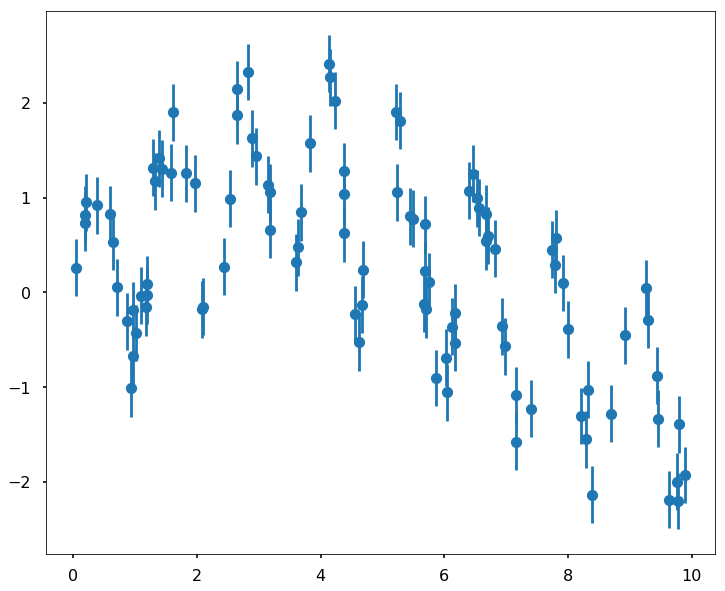

In [2]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (12,10))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

## Fit a Random Forest Model

We will use random forest, a method that based on decision trees. The idea actually is very simple, if we look at the following figure the blue line, we just ask some questions like this: if my data is between 0.5 and 3.3, then my target value will be 0.7. We can think the regression line is made up by many segment of flat lines, therefore, we see many step-like lines on the following graph. 

![png](http://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png "tree regression")

In the following, we fit a random forest model with 100 trees (the more trees we use, the more flexible the model is, that we can model wiggly part), and all the other parameters are using the default. 

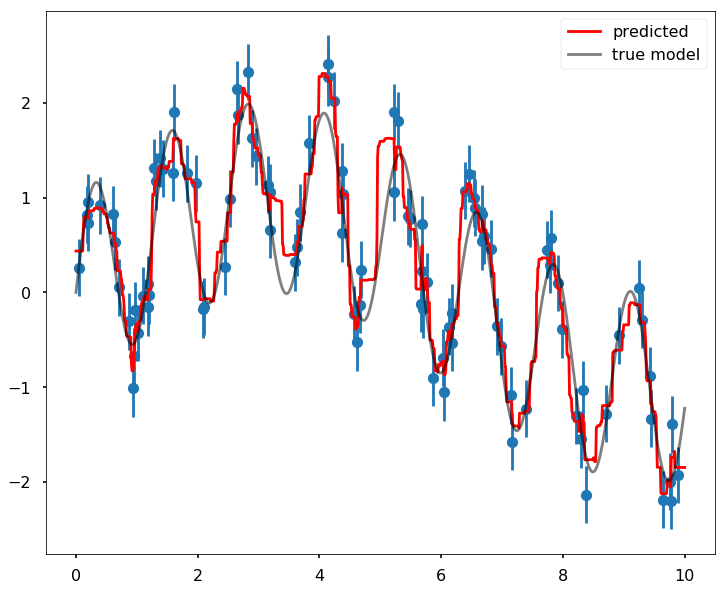

In [3]:
xfit = np.linspace(0, 10, 1000)

# fit the model and get the estimation for each data points
yfit = RandomForestRegressor(100, random_state=42).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()

Print out the misfit using the mean squared error.

In [4]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.0869576380256


## Using ANN

We can also use ANN for regression as well, the difference will be at the activation function in the output layer. Instead of using some functions like tanh or sigmoid to squeenze the results to a range between 0 and 1, we can use some linear activation function to generate any results. 

In [5]:
from sklearn.neural_network import MLPRegressor

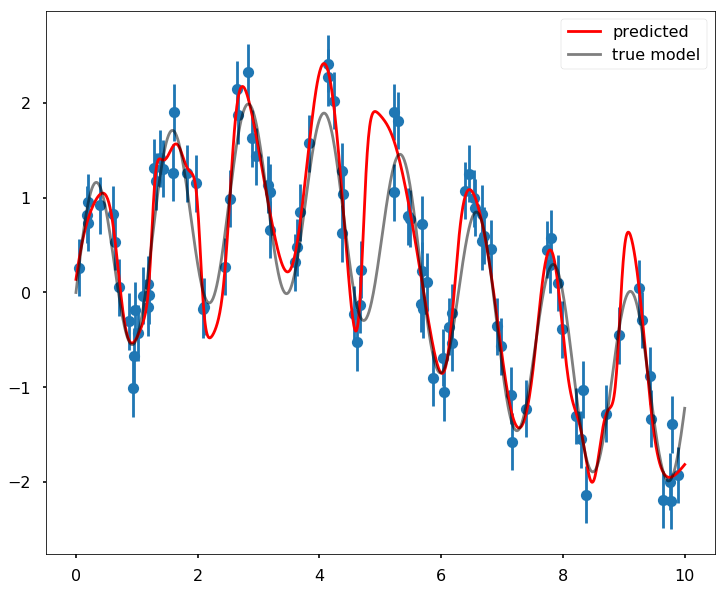

In [6]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)

yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()

In [7]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.161981739823


## Using Support Vector Machine

The Support Vector Machine method we talked about in the previous notebook can also be used in regression. Instead of import svm, we import svr for regression probelm. The API is quite similar as the ones we introduced before, here is the quick regression using SVR. 

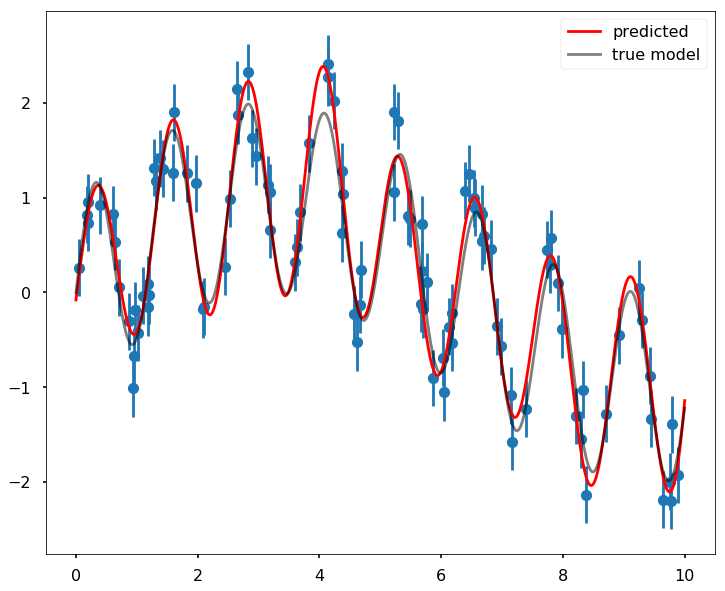

In [13]:
from sklearn.svm import SVR

# define your model
svr = SVR(C=1000)

# get the estimation from the model
yfit = svr.fit(x[:, None], y).predict(xfit[:, None])

# plot the results as above
plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()

In [14]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.0289468172074


## References

* [Intro-to-sklearn](https://github.com/PythonWorkshop/intro-to-sklearn)
* [sklearn tutorial](https://github.com/jakevdp/sklearn_tutorial) by [Jake Vanderplas](https://staff.washington.edu/jakevdp/)
* [Python Machine Learning](https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130/) by [Sebastian Raschka](https://sebastianraschka.com/)
* [sklearn documentation](http://scikit-learn.org/stable/documentation.html)  
* [sklearn examples](http://scikit-learn.org/stable/auto_examples/index.html)  